In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("disney_plus_titles.csv")

In [5]:
data.info

<bound method DataFrame.info of      show_id     type                           title  \
0         s1    Movie                   A Spark Story   
1         s2    Movie                  Spooky Buddies   
2         s3    Movie          The Fault in Our Stars   
3         s4  TV Show                 Dog: Impossible   
4         s5  TV Show  Spidey And His Amazing Friends   
...      ...      ...                             ...   
1363   s1364    Movie          The Sword in the Stone   
1364   s1365    Movie                 Those Calloways   
1365   s1366  TV Show            Disney Kirby Buckets   
1366   s1367  TV Show                  Disney Mech-X4   
1367   s1368  TV Show              Imagination Movers   

                        director  \
0     Jason Sterman, Leanne Dare   
1                   Robert Vince   
2                     Josh Boone   
3                            NaN   
4                            NaN   
...                          ...   
1363         Wolfgang Reitherma

In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [7]:
data.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [9]:
data.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [3]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from textblob import TextBlob

In [23]:
data['release_year'] = pd.to_datetime(data['release_year'],format='%Y',errors='coerce')

In [24]:
data = data.dropna(subset=['release_year'])

In [25]:
releases_per_year = data['release_year'].dt.year.value_counts().sort_index()

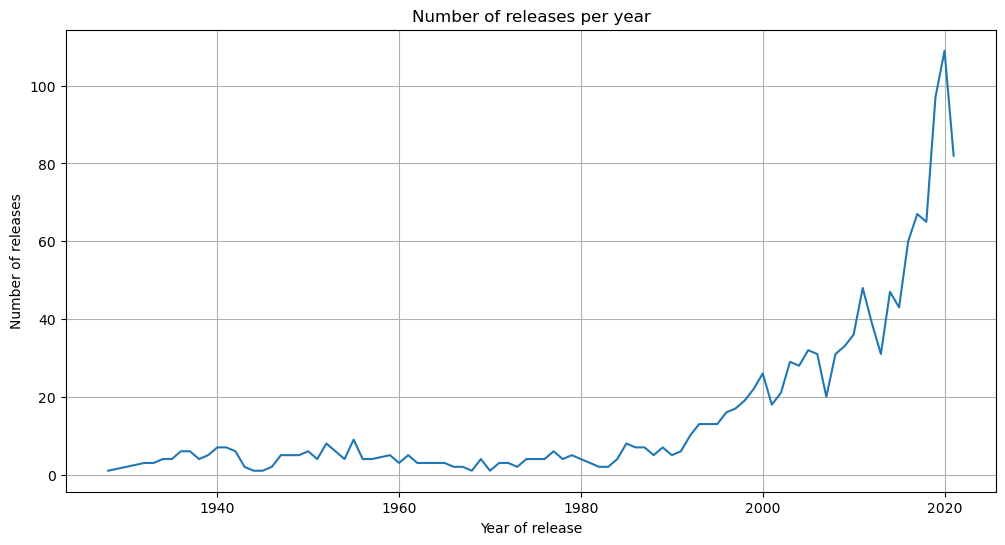

In [26]:
plt.figure(figsize=(12,6))
releases_per_year.plot(kind='line')
plt.title('Number of releases per year')
plt.xlabel("Year of release")
plt.ylabel("Number of releases")
plt.grid(True)
plt.show()

In [14]:
data['description'] = data['description'].astype(str)

In [7]:
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [8]:
data['sentiment']=data['description'].apply(lambda x: get_sentiment(x)[0])
data['subjectivity']=data['description'].apply(lambda x: get_sentiment(x)[1])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


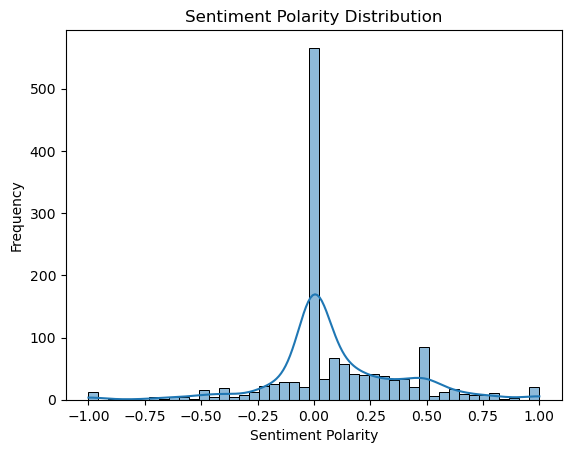

In [9]:
sns.histplot(data['sentiment'],kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [15]:
vectorizer=TfidfVectorizer(stop_words='english')
x=vectorizer.fit_transform(data['description'])

In [19]:
Kmeans = KMeans(n_clusters=5,random_state=42)
data['cluster'] = Kmeans.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
pca = PCA(n_components=2,random_state=42)
x_pca = pca.fit_transform(x.toarray())

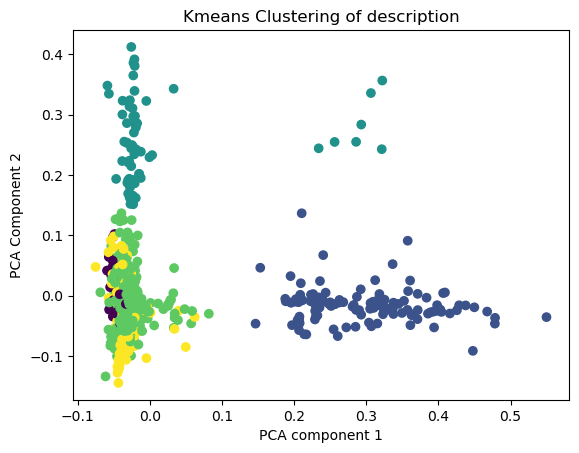

In [21]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=data['cluster'],cmap='viridis')
plt.title('Kmeans Clustering of description')
plt.xlabel("PCA component 1")
plt.ylabel("PCA Component 2")
plt.show()